# Deaths: Retrospective evaluation, comparison with EU Hub

In [2]:
%load_ext autoreload
%autoreload 2
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob 
import warnings
import time
warnings.filterwarnings("ignore")
import sys
sys.path.append('../source/')
sys.path.append('../methods_configuration/') 
import numpy as np
import time
from benchmark import benchmark 
from visualization import plot_last_forecast     
import pandas as pd
from scipy import stats 
import matplotlib.colors as colors
import seaborn as sns
import matplotlib.ticker as tickerv 
from paper_evaluation_hub import evaluation_hub
from scipy.stats.mstats import winsorize

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
from countries_preselected import countries_JHU  
countries = list(set(countries_JHU)-set(["Cases_on_an_international_conveyance_Japan", 
                                            "Diamond_Princess", "Diamond Princess", "MS Zaandam"]))  

In [6]:
models = [#'ILM-EKF',
          #'MUNI-ARIMA', 
          #'USC-SIkJalpha',
          'EuroCOVIDhub-ensemble',
          'IEM_Health-CovidProject',
          'RobertWalraven-ESG',
          "EuroCOVIDhub-baseline"
]

In [7]:
def print_rank(crit): 
    col_l = models[:-1]+['SDSC_ISG']
    countries = np.array(RI["country"])
    rank_ = np.argsort(crit.argsort(axis=1), axis=1)
    for i, col in enumerate(col_l): 
        rank__ = rank_[:,i] 
        for i in range(1,6):
            print(col + " better or equal to the place "+str(i)+" ", np.sum(rank__<i)) 
            print([countries[j] for j in range(len(countries)) if rank__[j]==i-1] )
def plot_hist(mat,cols,name,upper_bound=2.4):

    col_l = models[:-1]+['SDSC_ISG']
    
    c = ["red","blue","green","orange","magenta","grey","yellow"]
    fig,ax = plt.subplots(len(col_l),1,figsize=(7,len(col_l)*5/5),sharex=True,dpi=600)
    
    bins = np.arange(0.2, upper_bound+0.1, 0.1) 
    
    for i in range(0,len(cols)):
        
        vals = np.where(mat[cols[i]]<upper_bound, mat[cols[i]],upper_bound)
         
        h = sns.histplot(vals,bins=bins,alpha=0.7, ax=ax[i],color=c[i])
        print(h)
        ax[i].legend([col_l[i]])
        ax[i].grid(which='major')
        ax[i].set(ylabel='') 
        ax[i].set_xlim([0,upper_bound])
        ax[i].xaxis.set_ticks(bins)
        ax[i].xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
        temp = ax[i].xaxis.get_ticklabels()
        temp = list(set(temp) - set(temp[::2]))
        for label in temp:
            label.set_visible(False)
    
    plt.tight_layout(pad=0)
    plt.savefig(name+'.pdf')

#  Compare the method from our dashboard with submissions to EU Covid-19 Forecast Hub

# 1 week ahead results


In [8]:
errors, RI, WIS, coverage = evaluation_hub(countries, 
                                           date_limits=['2021-04-01','2022-12-15'],
                                           models=models, addon="",
                                           typedata="deaths",
                                           H=7, 
                                           baseline = "EuroCOVIDhub-baseline") 

## MAE: Table and histogram 1 week ahead forecast w.r.t. EuroCOVIDhub-baseline

\begin{tabular}{lrrrr}
\toprule
       country &  EuroCOVIDhub-ensemble\_RIMAE &  IEM\_Health-CovidProject\_RIMAE &  RobertWalraven-ESG\_RIMAE &  forecast\_RIMAE \\
\midrule
       Austria &                         1.21 &                           0.99 &                      1.01 &            0.81 \\
       Belgium &                         1.11 &                           0.99 &                      0.98 &            1.36 \\
      Bulgaria &                         1.40 &                           1.31 &                      1.32 &            1.21 \\
       Croatia &                         1.27 &                           0.98 &                      1.39 &            1.09 \\
        Cyprus &                         0.92 &                           0.85 &                      0.71 &            1.08 \\
       Czechia &                         1.30 &                           0.78 &                      1.27 &            0.84 \\
       Denmark &                         0.99 &           

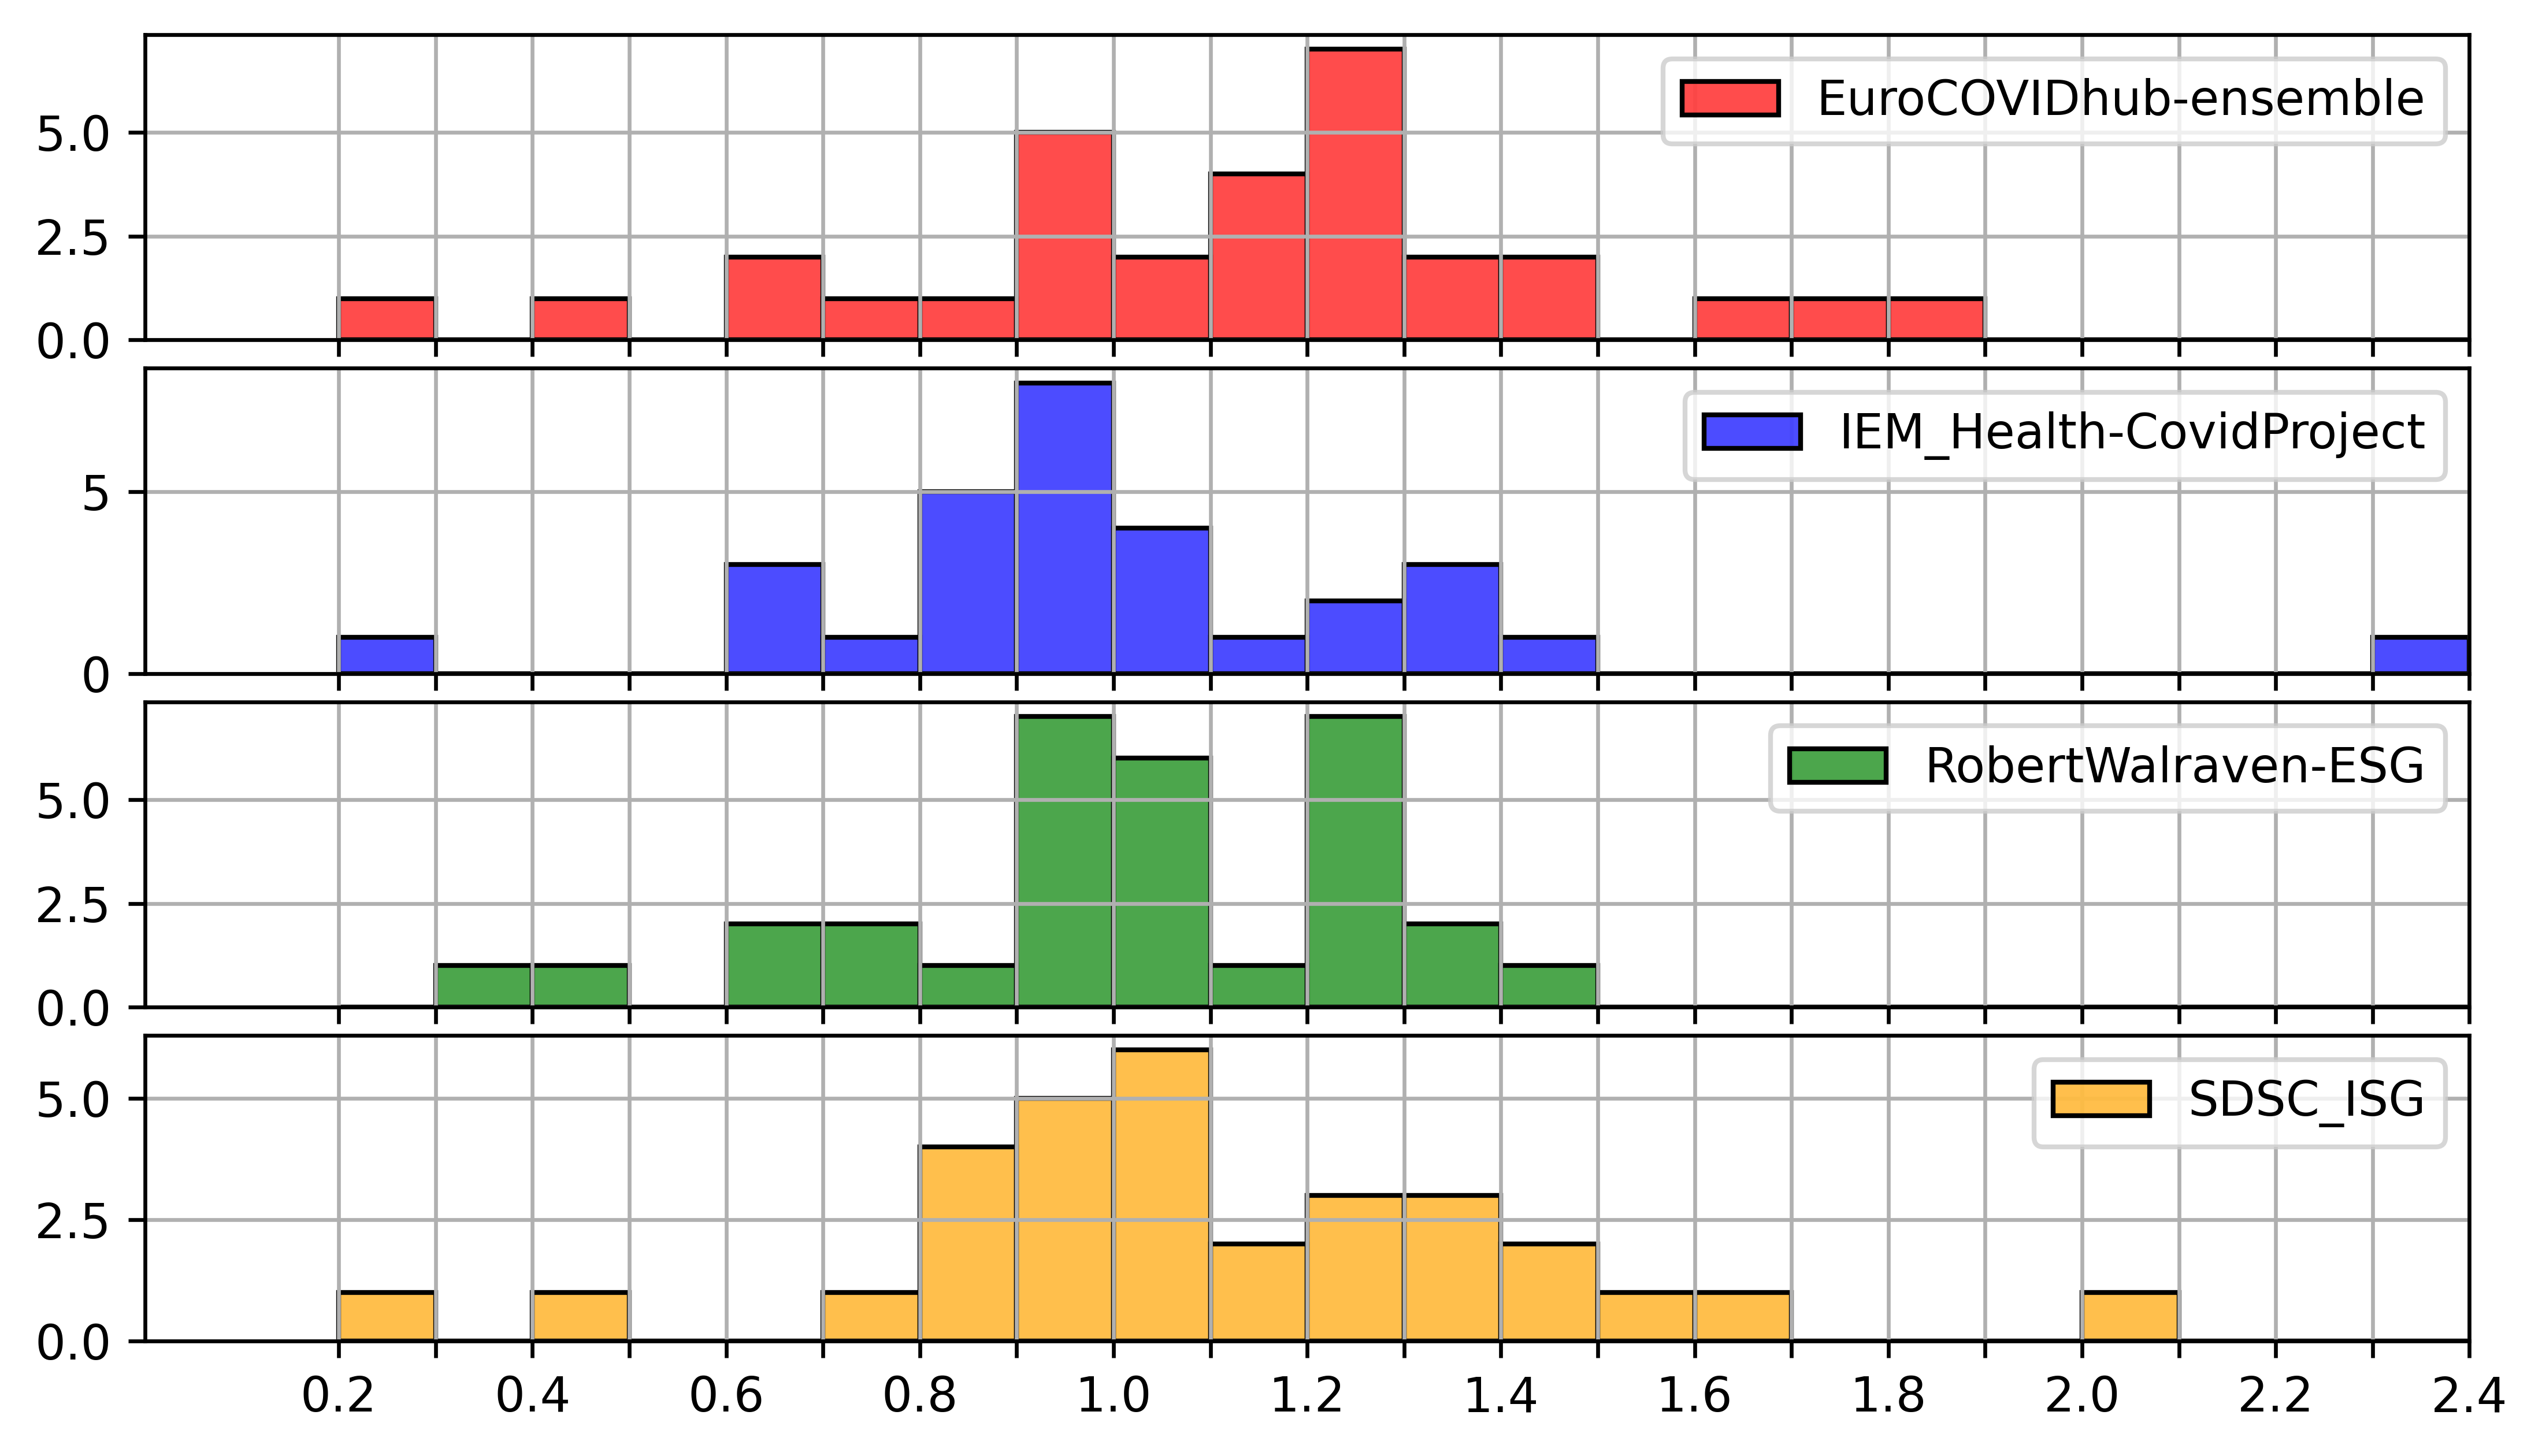

In [9]:
print(RI[["country"]+sorted([col for col in RI.columns if "RIMAE" in col])].round(2).to_latex(index=False))
cols = sorted([col for col in RI.columns if "RIMAE" in col])
crit = RI[cols].values 
print_rank(crit)
plot_hist(RI,cols,"mae_1w",upper_bound=2.4)

## WIS:  Table and histogram 1 week ahead forecast w.r.t. EuroCOVIDhub-baseline

EuroCOVIDhub-ensemble better or equal to the place 1  1
['Norway']
EuroCOVIDhub-ensemble better or equal to the place 2  8
['Estonia', 'Finland', 'France', 'Iceland', 'Slovenia', 'Sweden', 'Switzerland']
EuroCOVIDhub-ensemble better or equal to the place 3  20
['Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Ireland', 'Latvia', 'Liechtenstein', 'Luxembourg', 'Malta', 'Portugal']
EuroCOVIDhub-ensemble better or equal to the place 4  31
['Austria', 'Germany', 'Greece', 'Hungary', 'Italy', 'Lithuania', 'Netherlands', 'Poland', 'Romania', 'Slovakia', 'Spain']
EuroCOVIDhub-ensemble better or equal to the place 5  31
[]
IEM_Health-CovidProject better or equal to the place 1  17
['Belgium', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'Germany', 'Greece', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Romania', 'Slovakia', 'Sweden']
IEM_Health-CovidProject better or equal to the place 2  26
['Austria', 'Bulgaria', 'Hungary', 'Liechtenstein', 'Lux

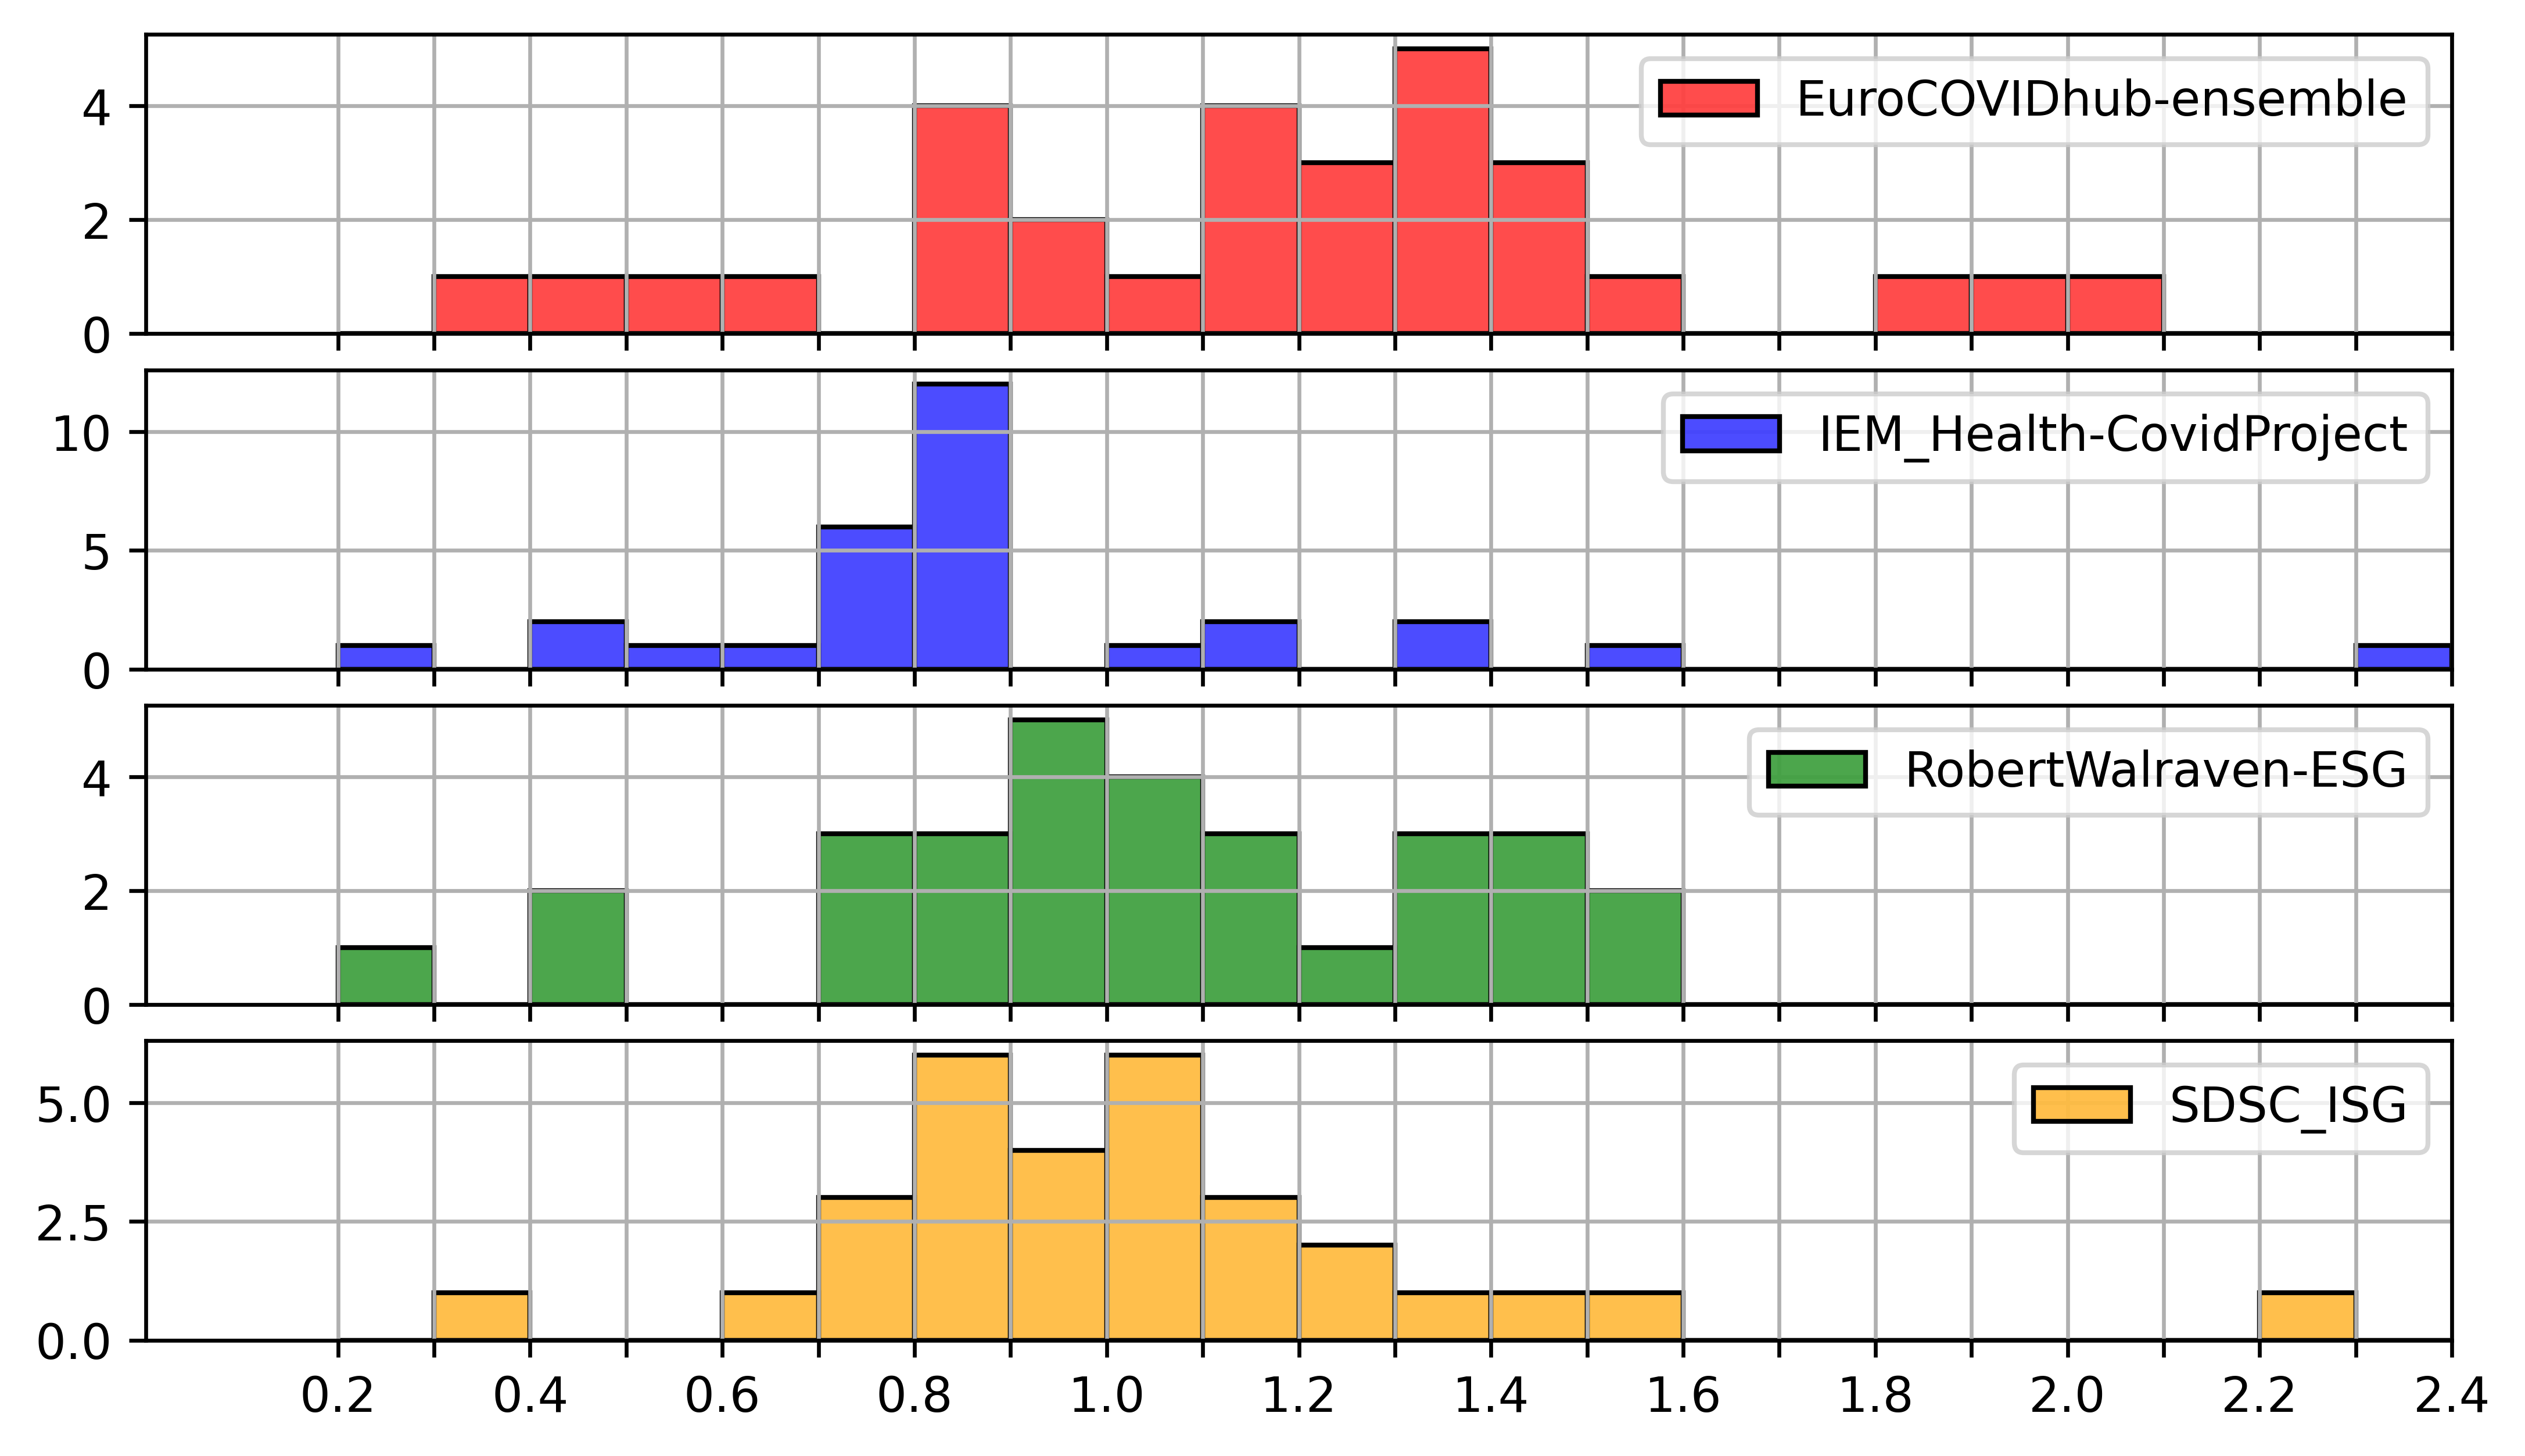

In [10]:
cols = [col for col in WIS.columns if "abs" not in col]
cols = [cols[0]]+sorted(cols[1:])

crit = WIS[cols[1:]].values 
print_rank(crit)

plot_hist(WIS,cols[1:],"wis_1w",upper_bound=2.4)

print(WIS[cols].round(2).to_latex(index=False))

# 2 weeks ahead results


In [12]:
#countries
errors, RI_2, WIS_2,coverage = evaluation_hub(countries, date_limits=['2021-04-01','2021-12-30'], 
                                          models=models, addon="",typedata="deaths",H=14,baseline = "EuroCOVIDhub-baseline") 

## MAE:  Table and histogram 1 week ahead forecast w.r.t. EuroCOVIDhub-baseline

In [13]:
crit = RI_2[sorted([col for col in RI_2.columns if "RIMAE" in col])].values 
print_rank(crit)

EuroCOVIDhub-ensemble better or equal to the place 1  5
['Estonia', 'Finland', 'Latvia', 'Luxembourg', 'Norway']
EuroCOVIDhub-ensemble better or equal to the place 2  14
['Cyprus', 'Iceland', 'Liechtenstein', 'Malta', 'Portugal', 'Slovenia', 'Spain', 'Sweden', 'Switzerland']
EuroCOVIDhub-ensemble better or equal to the place 3  19
['Belgium', 'Denmark', 'France', 'Ireland', 'Lithuania']
EuroCOVIDhub-ensemble better or equal to the place 4  31
['Austria', 'Bulgaria', 'Croatia', 'Czechia', 'Germany', 'Greece', 'Hungary', 'Italy', 'Netherlands', 'Poland', 'Romania', 'Slovakia']
EuroCOVIDhub-ensemble better or equal to the place 5  31
[]
IEM_Health-CovidProject better or equal to the place 1  9
['Bulgaria', 'Croatia', 'Denmark', 'Germany', 'Greece', 'Iceland', 'Liechtenstein', 'Lithuania', 'Romania']
IEM_Health-CovidProject better or equal to the place 2  20
['Belgium', 'Czechia', 'Finland', 'Hungary', 'Ireland', 'Italy', 'Luxembourg', 'Netherlands', 'Norway', 'Poland', 'Slovakia']
IEM_Hea

In [14]:
print(RI_2[["country"]+sorted([col for col in RI_2.columns if "RIMAE" in col])].round(2).to_latex(index=False))

\begin{tabular}{lrrrr}
\toprule
       country &  EuroCOVIDhub-ensemble\_RIMAE &  IEM\_Health-CovidProject\_RIMAE &  RobertWalraven-ESG\_RIMAE &  forecast\_RIMAE \\
\midrule
       Austria &                         2.45 &                           1.89 &                      1.78 &            1.55 \\
       Belgium &                         2.03 &                           1.55 &                      1.45 &            2.42 \\
      Bulgaria &                         2.77 &                           2.26 &                      2.39 &            2.47 \\
       Croatia &                         3.06 &                           2.42 &                      2.91 &            2.52 \\
        Cyprus &                         1.42 &                           1.46 &                      1.22 &            2.45 \\
       Czechia &                         2.29 &                           1.48 &                      2.05 &            1.38 \\
       Denmark &                         1.80 &           

## WIS:  Table and histogram 2 week ahead forecast w.r.t. EuroCOVIDhub-baseline

In [15]:
cols = [col for col in WIS_2.columns if "abs" not in col]
cols = [cols[0]]+sorted(cols[1:])
print(WIS_2[cols].round(2).to_latex(index=False))

\begin{tabular}{lrrrr}
\toprule
       country &  EuroCOVIDhub-ensembleWIS &  IEM\_Health-CovidProjectWIS &  RobertWalraven-ESGWIS &  forecastsqrtWIS \\
\midrule
       Austria &                      2.47 &                        1.63 &                   2.05 &             1.66 \\
       Belgium &                      2.67 &                        1.61 &                   1.66 &             2.74 \\
      Bulgaria &                      3.29 &                        2.44 &                   3.33 &             2.94 \\
       Croatia &                      3.26 &                        2.25 &                   3.44 &             2.38 \\
        Cyprus &                      1.14 &                        1.06 &                   1.13 &             1.86 \\
       Czechia &                      2.61 &                        1.37 &                   3.03 &             1.47 \\
       Denmark &                      1.40 &                        1.04 &                   1.48 &             1.84 \

AxesSubplot(0.125,0.71587;0.775x0.16413)
AxesSubplot(0.125,0.518913;0.775x0.16413)
AxesSubplot(0.125,0.321957;0.775x0.16413)
AxesSubplot(0.125,0.125;0.775x0.16413)


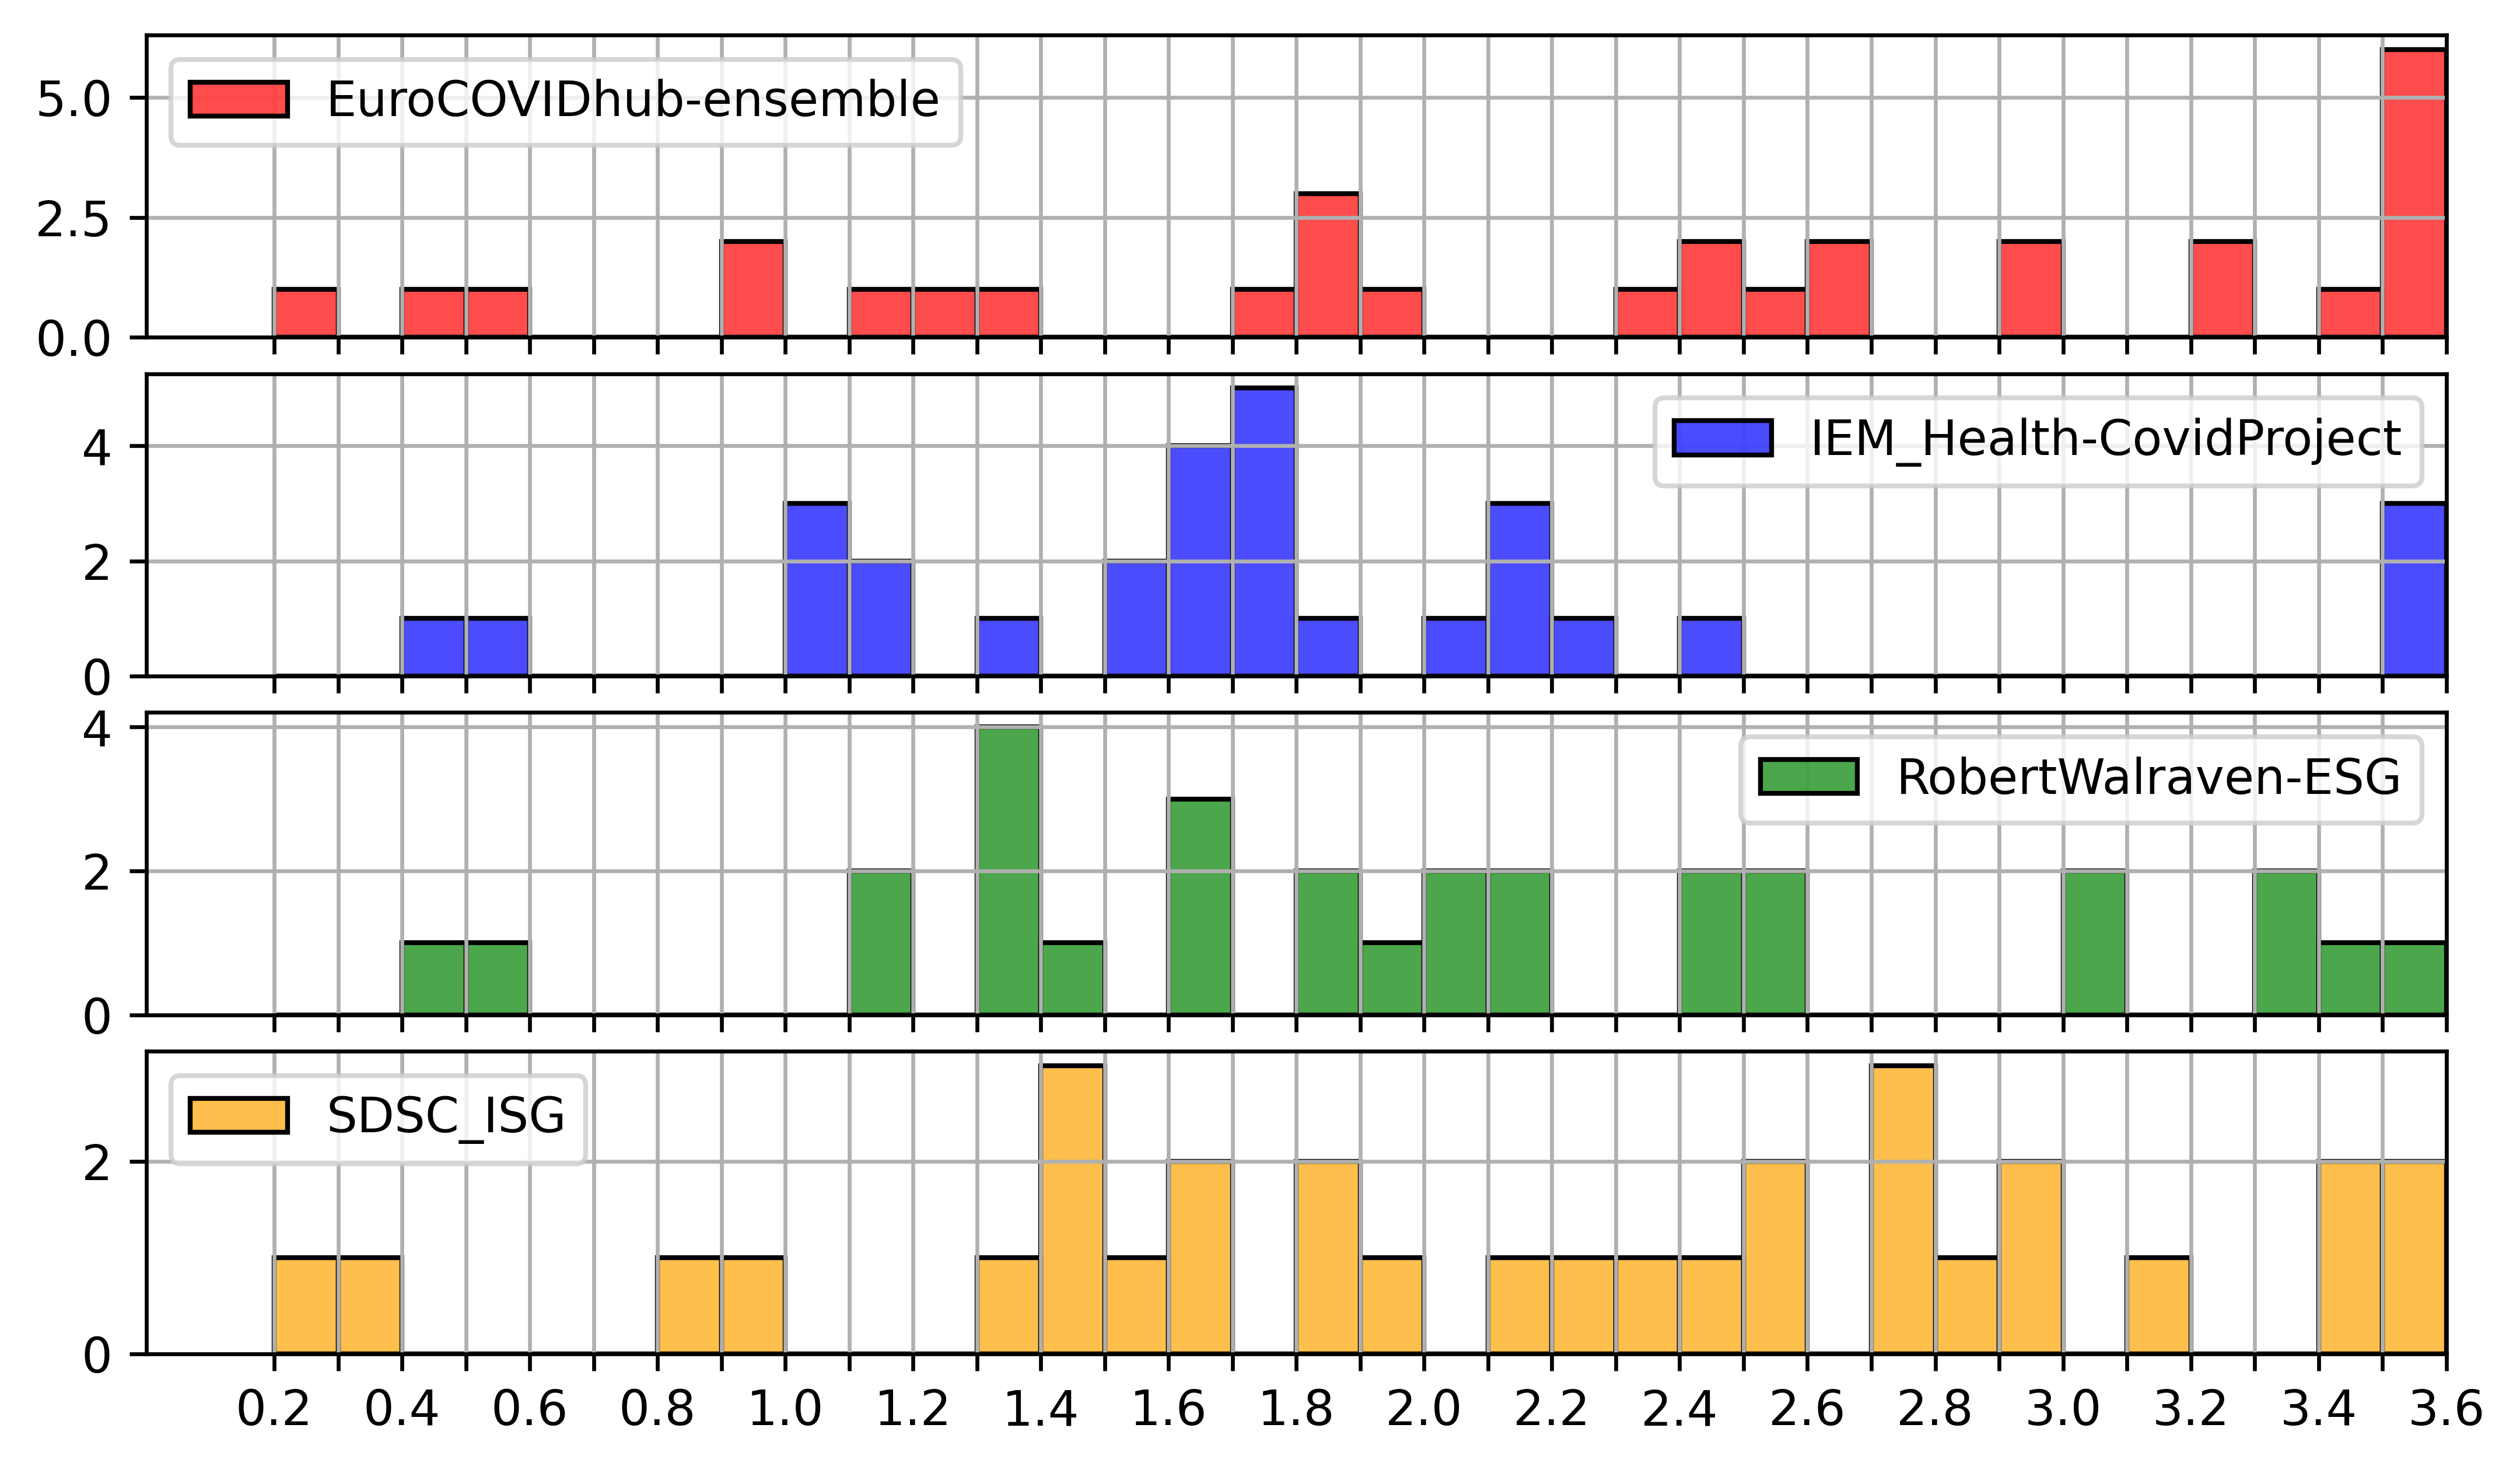

In [16]:

plot_hist(WIS_2,cols[1:],"wis_2w",upper_bound=3.6)

In [17]:
crit = WIS_2[cols[1:]].values

        
print_rank(crit)

EuroCOVIDhub-ensemble better or equal to the place 1  2
['Finland', 'Norway']
EuroCOVIDhub-ensemble better or equal to the place 2  9
['Denmark', 'Estonia', 'Iceland', 'Latvia', 'Malta', 'Slovenia', 'Switzerland']
EuroCOVIDhub-ensemble better or equal to the place 3  23
['Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'France', 'Greece', 'Ireland', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Portugal', 'Spain', 'Sweden']
EuroCOVIDhub-ensemble better or equal to the place 4  31
['Austria', 'Germany', 'Hungary', 'Italy', 'Netherlands', 'Poland', 'Romania', 'Slovakia']
EuroCOVIDhub-ensemble better or equal to the place 5  31
[]
IEM_Health-CovidProject better or equal to the place 1  20
['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Germany', 'Greece', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Liechtenstein', 'Lithuania', 'Netherlands', 'Romania', 'Slovakia', 'Spain']
IEM_Health-CovidProject better or equal to the place 2  26
['Finland', '

In [18]:
crit = RI_2[ sorted([col for col in RI_2.columns if "RIMAE" in col])].values 
print_rank(crit)

EuroCOVIDhub-ensemble better or equal to the place 1  5
['Estonia', 'Finland', 'Latvia', 'Luxembourg', 'Norway']
EuroCOVIDhub-ensemble better or equal to the place 2  14
['Cyprus', 'Iceland', 'Liechtenstein', 'Malta', 'Portugal', 'Slovenia', 'Spain', 'Sweden', 'Switzerland']
EuroCOVIDhub-ensemble better or equal to the place 3  19
['Belgium', 'Denmark', 'France', 'Ireland', 'Lithuania']
EuroCOVIDhub-ensemble better or equal to the place 4  31
['Austria', 'Bulgaria', 'Croatia', 'Czechia', 'Germany', 'Greece', 'Hungary', 'Italy', 'Netherlands', 'Poland', 'Romania', 'Slovakia']
EuroCOVIDhub-ensemble better or equal to the place 5  31
[]
IEM_Health-CovidProject better or equal to the place 1  9
['Bulgaria', 'Croatia', 'Denmark', 'Germany', 'Greece', 'Iceland', 'Liechtenstein', 'Lithuania', 'Romania']
IEM_Health-CovidProject better or equal to the place 2  20
['Belgium', 'Czechia', 'Finland', 'Hungary', 'Ireland', 'Italy', 'Luxembourg', 'Netherlands', 'Norway', 'Poland', 'Slovakia']
IEM_Hea

AxesSubplot(0.125,0.71587;0.775x0.16413)
AxesSubplot(0.125,0.518913;0.775x0.16413)
AxesSubplot(0.125,0.321957;0.775x0.16413)
AxesSubplot(0.125,0.125;0.775x0.16413)


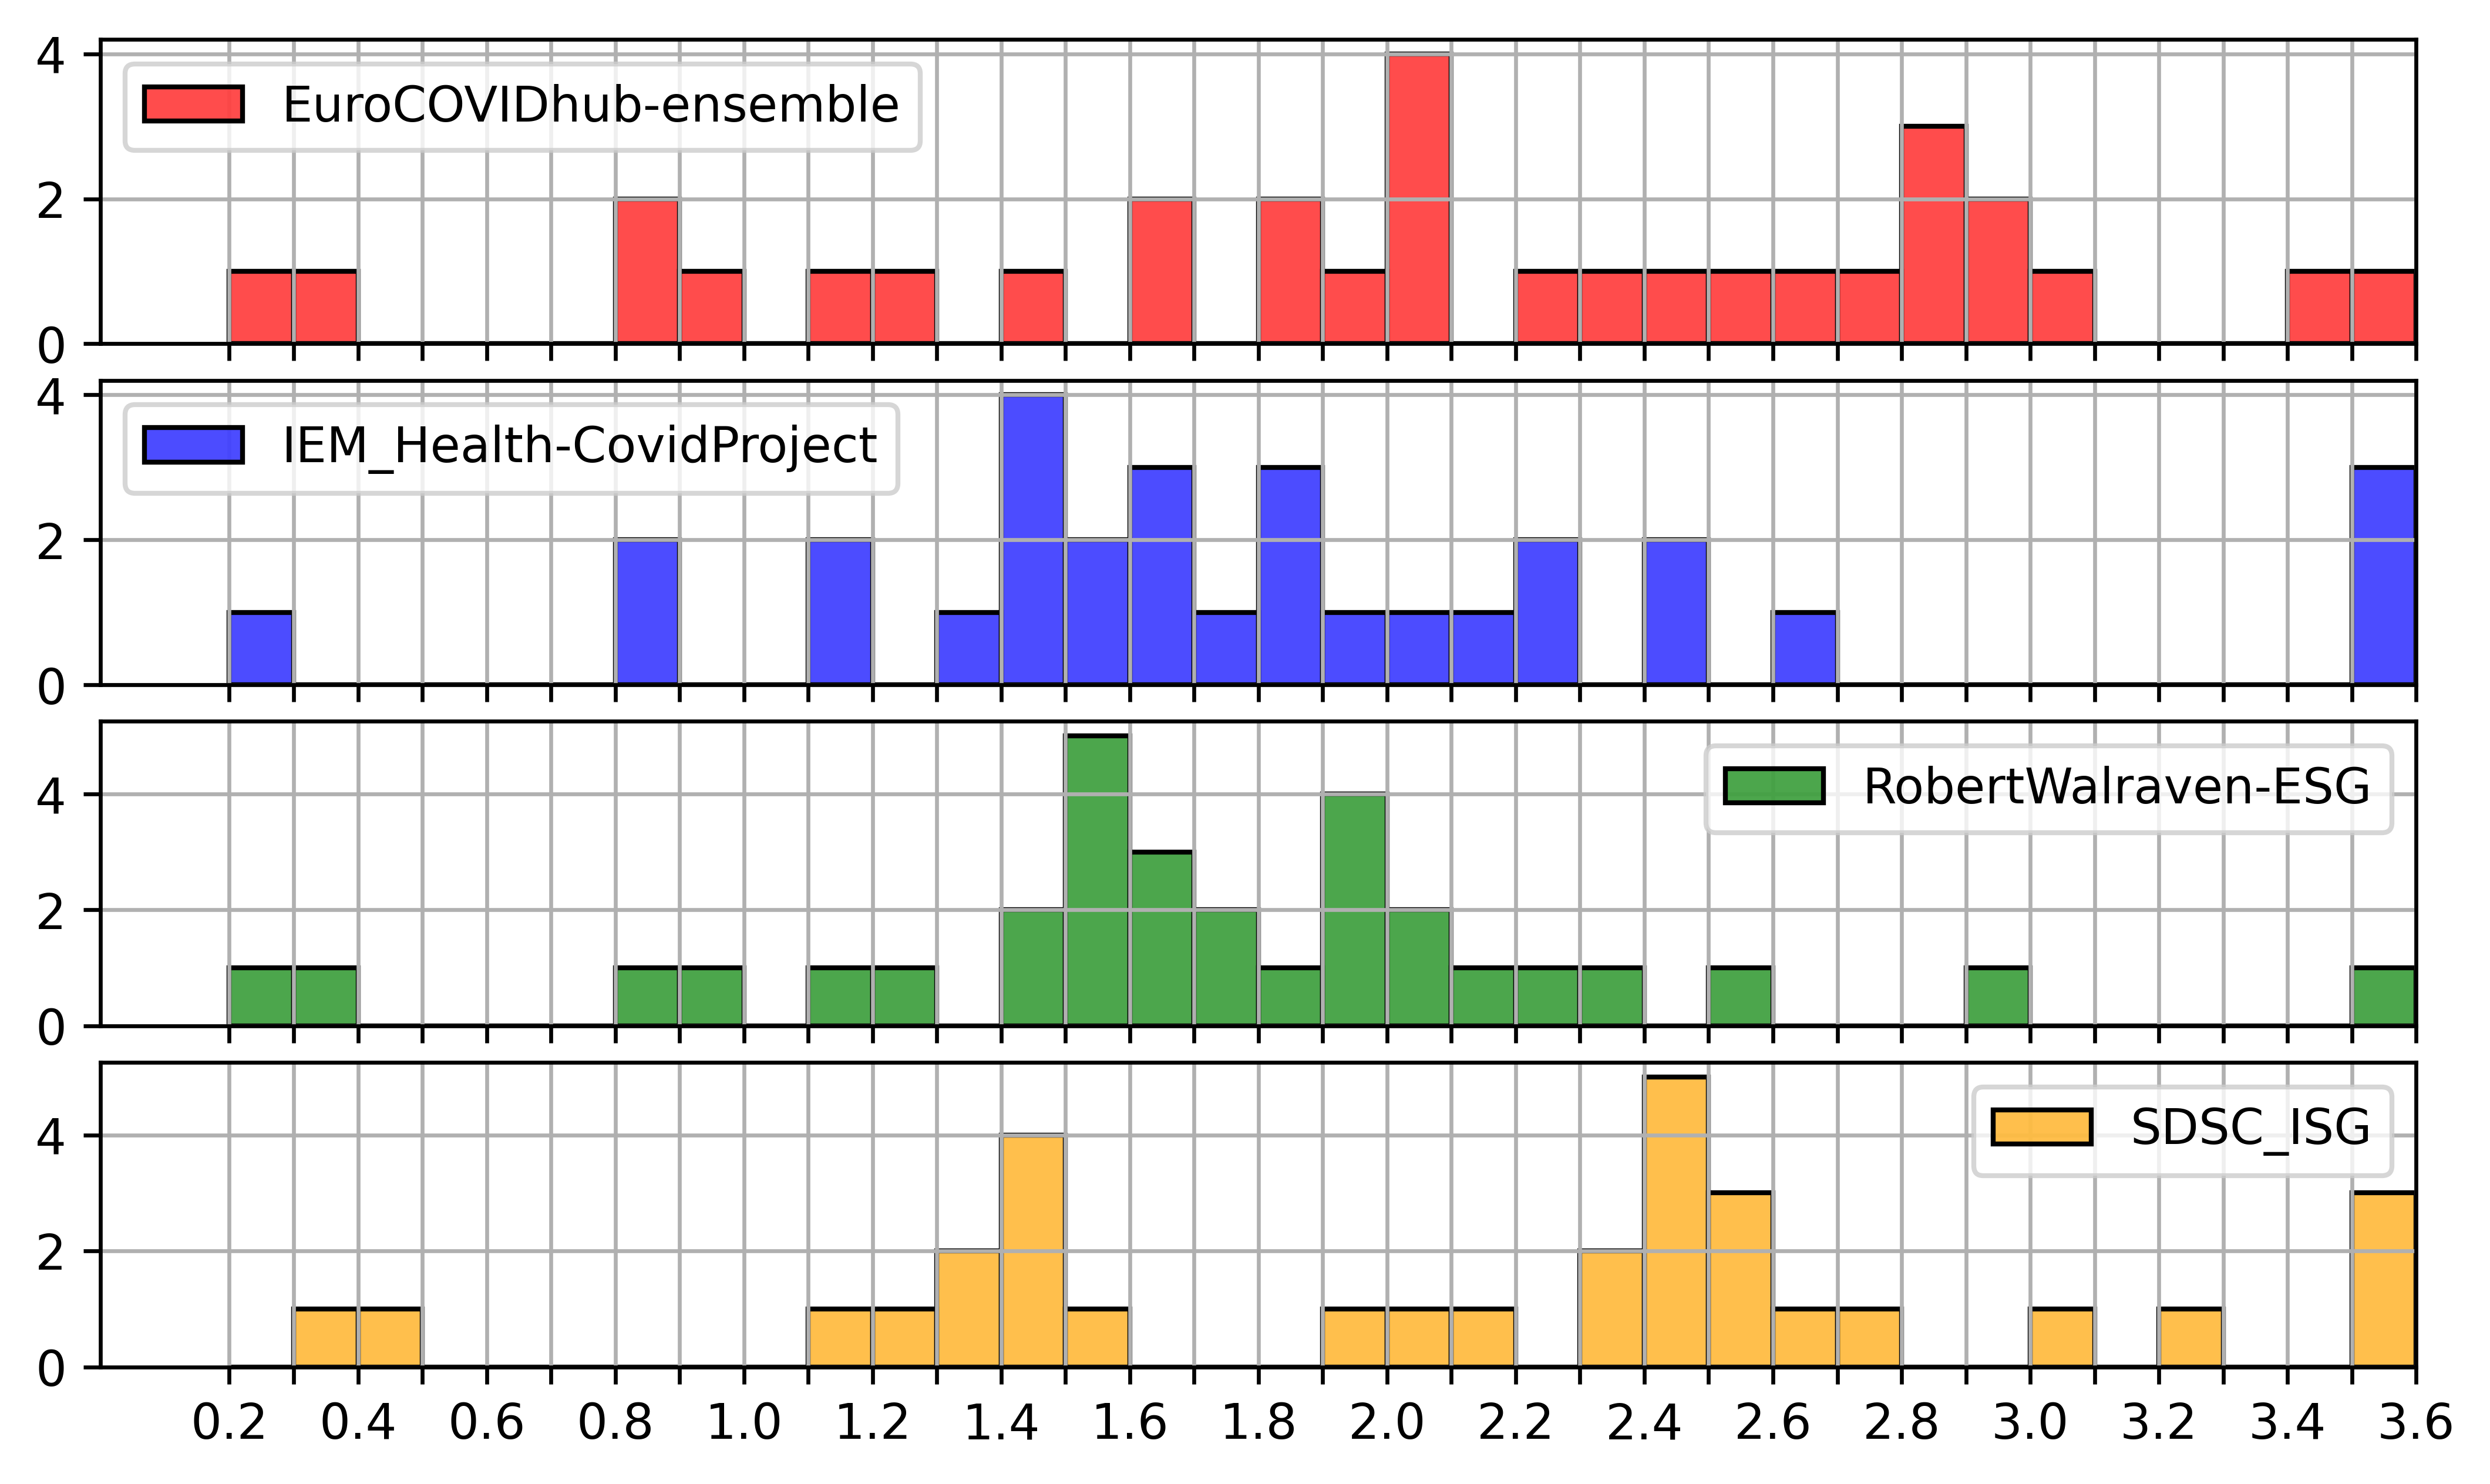

In [19]:
cols = sorted([col for col in RI_2.columns if "RIMAE" in col])
plot_hist(RI_2,cols,"mae_2w",upper_bound=3.6)
